In [5]:
# 자연어 처리 패키지 ( Natural Language Toolkit )
import nltk

In [3]:
# punkt, stopwords download
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

- Wordcloud 설치 : conda activate base => conda install -c conda-forge wordcloud

In [6]:
from wordcloud import WordCloud, STOPWORDS      # 전부 대문자 = 상?수 (값이 정해지면 프로그램에서 변하지 못하는 변수)
from PIL import Image                           # 이미지 show, 이미지 보여주고싶을 때 

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

#### Alice in Wonderland 

In [8]:
with open('data/Alice.txt') as file:        # 파일 읽기 
    text = file.read()

In [11]:
STOPWORDS      # 불용어 , 형태는 set(중복을  배제하기 위한 형태)

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [12]:
# stopwords
stopwords = STOPWORDS
len(stopwords)

192

In [13]:
# stopwords 에 'said' 추가 
stopwords.add('said')

In [16]:
wc = WordCloud(background_color='white', max_words=2000, stopwords=stopwords)       # wc 객체 생성
wc = wc.generate(text)       # 텍스트를 읽고 단어의 빈도 계산 

In [18]:
keys = list(wc.words_.keys())
values = list(wc.words_.values())
for i in range(10):
    print(f'{keys[i]}: {values[i]}')        # 상대적인 빈도 나타내줌 

Alice: 1.0
little: 0.29508196721311475
one: 0.27595628415300544
know: 0.2459016393442623
went: 0.226775956284153
thing: 0.2185792349726776
time: 0.2103825136612022
Queen: 0.20765027322404372
see: 0.1830601092896175
King: 0.17486338797814208


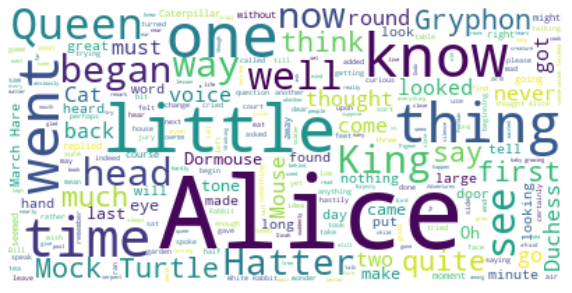

In [20]:
# 그림 그리기 
plt.figure(figsize=(10,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

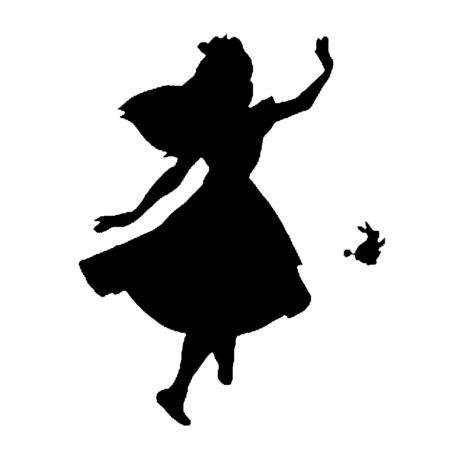

In [21]:
# 그림 위에 표시하기   
mask = np.array(Image.open('data/Alice_mask.png'))
plt.figure(figsize=(8,8))
plt.imshow(mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()


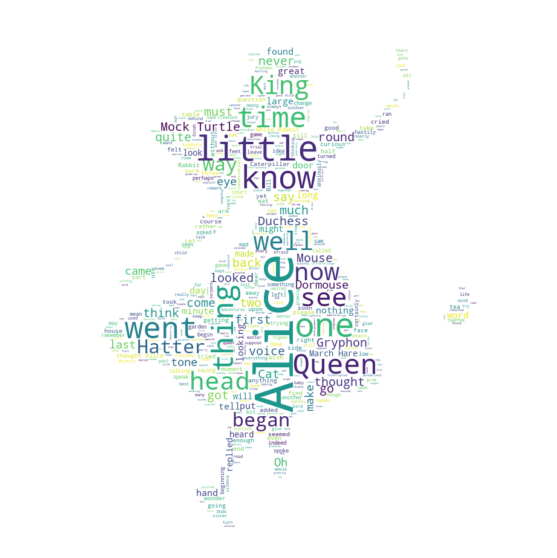

In [24]:
wc = WordCloud(background_color='white', max_words=2000, stopwords=stopwords,
                mask = mask)       # wc 객체 생성 시 mask 옵션 추가 
wc = wc.generate(text)  
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

#### Star Wars - A New Hope

In [31]:
with open('data/A_new_hope.txt') as file:
    text = file.read()
text = text.replace('HAN', 'Han').replace("LUKE'S", 'Luke')
mask = np.array(Image.open('data/Stormtrooper_mask.png'))

In [32]:
stopwords = STOPWORDS
stopwords.add('int')
stopwords.add('ext')

In [33]:
wc = WordCloud(max_words=1000, stopwords=stopwords, mask=mask, 
                margin=10, random_state=1).generate(text)       # wc 객체 생성( 여러 옵션을 없애고 변경한 거 맞음)

default_colors = wc.to_array()

In [37]:
# HSL (Hue, Saturation, Lightness) 코드로 변환 - 칼라 코드 종류임 
def grey_color(word, font_size, position, orientation, random_state=None,
                **kwargs):
    return f'hsl(0, 0%, {np.random.randint(60,101)}%)'       # 그레이/ 라이트니스 : 60~100까지 밝음정도(만 설정되어있음)

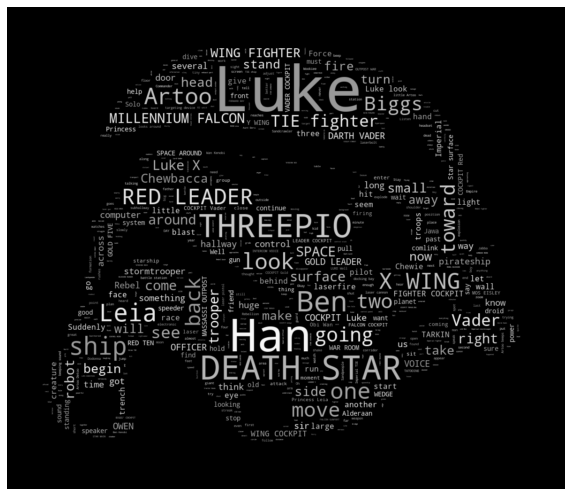

In [38]:
plt.figure(figsize=(10,10))
plt.imshow(wc.recolor(color_func=grey_color, random_state=3), interpolation='bilinear')
plt.axis('off')
plt.show()